# Linea D

Hipotesis: 
La cercanía a las estaciones de la linea D influye en el precio de las propiedades, para esto tomaremos los barrios que son recorridos por la linea D y veremos si la distancia a las paradas de esta influye en el precio de las propiedades.
Primer approach: tomamos cada barrio vemos cuales son las distancias de sus propiedades a las paradas, y tomamos la menor. Luego realizamos un scatter plot con estos datos y vemos si la distribucion del precio influye en ésta.

La línea D pasa por: Monserrat, San nicolas, Balvanera, Recoleta, Palermo, Belgrano

In [1]:
import datetime as datetime
import codecs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config IPCompleter.greedy=True

#Data de properati
df = pd.read_csv('/home/martin/Documents/jupyter/datos_procesados.csv')

#Filtramos solo las propiedades de Capital Federal
propDF = df[df['state_name']== 'Capital Federal']

propDFf = propDF[['property_type','place_name','rooms','lat','lon','price']]

propRecorridoD= propDFf[propDFf.place_name.str.contains('Monserrat') |
                        propDFf.place_name.str.contains('San Nicolas')|
                        propDFf.place_name.str.contains('Balvanera')|
                        propDFf.place_name.str.contains('Recoleta')|
                        propDFf.place_name.str.contains('Palermo')|
                        propDFf.place_name.str.contains('Belgrano')|
                        propDFf.place_name.str.contains('Barrio Norte')]

propRecorridoD.dropna(inplace = True)
propRecorridoD.info()

/home/martin/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,4,5,6,9,25,29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9200 entries, 360720 to 493465
Data columns (total 6 columns):
property_type    9200 non-null object
place_name       9200 non-null object
rooms            9200 non-null float64
lat              9200 non-null float64
lon              9200 non-null float64
price            9200 non-null float64
dtypes: float64(4), object(2)
memory usage: 503.1+ KB


/home/martin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [2]:
df = pd.read_csv('/home/martin/Documents/jupyter/estaciones-de-subte.csv', encoding = "ISO-8859-1")

estacionesD = df[df['LINEA'] == 'D']
estacionesD.head(20)

,X,Y,ID,ESTACION,LINEA
5,-58.380574,-34.604245,6.0,9 DE JULIO,D
6,-58.397924,-34.599757,7.0,FACULTAD DE MEDICINA,D
7,-58.385142,-34.601587,8.0,TRIBUNALES - TEATRO COLÓN,D
8,-58.407161,-34.591628,9.0,AGÜERO,D
9,-58.415955,-34.585156,10.0,R.SCALABRINI ORTIZ,D
10,-58.421196,-34.581411,11.0,PLAZA ITALIA,D
11,-58.425711,-34.578422,12.0,PALERMO,D
53,-58.411294,-34.588237,54.0,BULNES,D
54,-58.402395,-34.594426,55.0,PUEYRREDON,D
55,-58.393125,-34.599640,56.0,CALLAO,D


In [3]:
i = 1
for index, row in estacionesD.iterrows():
    lon = estacionesD.loc[index,'X']
    lat = estacionesD.loc[index,'Y']
    label = str(i)
    propRecorridoD['lon' + label] = lon
    propRecorridoD['lat' + label] = lat
    i = i+1

/home/martin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/martin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [4]:
import math

def haversine(lat1, lon1, lat2, lon2):
    rad=math.pi/180
    dlat=lat2-lat1
    dlon=lon2-lon1
    R=6372.795477598
    a=(np.sin(rad*dlat/2))**2 + np.cos(rad*lat1)*np.cos(rad*lat2)*(np.sin(rad*dlon/2))**2
    distancia=2*R*np.arcsin(np.sqrt(a))
    distM = distancia*1000
    return distM

In [5]:
for row in estacionesD.iterrows():
    for i in range(1,17):
        label = str(i)
        lat1 = propRecorridoD['lat'].astype(float)
        lon1 = propRecorridoD['lon'].astype(float)
        lat2 = propRecorridoD['lat'+ label].astype(float)
        lon2 = propRecorridoD['lon'+ label].astype(float)
        #dist = np.absolute(propRecorridoE['lon'] - propRecorridoC['lon'+label]) + np.absolute(propRecorridoC['lat'] - propRecorridoC['lat'+label])
        dist = haversine(lat1,lon1,lat2,lon2)
        propRecorridoD['dist' + label] = dist

/home/martin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [6]:
propRecorridoD.head(5)

,property_type,place_name,rooms,lat,lon,price,lon1,lat1,lon2,lat2,...,dist7,dist8,dist9,dist10,dist11,dist12,dist13,dist14,dist15,dist16
360720,apartment,Palermo,1.0,-34.574594,-58.419255,71000.0,-58.380574,-34.604245,-58.397924,-34.599757,...,728.612762,1683.464156,2692.369109,3672.165043,1444.673244,2382.620773,3151.492933,3673.831664,5553.969502,4477.140671
360839,apartment,Barrio Norte,3.0,-34.603714,-58.381581,196000.0,-58.380574,-34.604245,-58.397924,-34.599757,...,4923.560726,3219.363464,2167.680182,1149.959910,5831.912828,6886.427101,7689.300021,8262.111549,833.124078,9128.897923
360877,apartment,Balvanera,3.0,-34.601861,-58.403538,150000.0,-58.380574,-34.604245,-58.397924,-34.599757,...,3304.408105,1673.521820,833.618023,984.802555,4137.019176,5170.500325,5959.507231,6547.217859,2787.637508,7447.425479
360890,apartment,Palermo,2.0,-34.579034,-58.438252,160000.0,-58.380574,-34.604245,-58.397924,-34.599757,...,1150.451222,2672.439834,3702.882383,4725.141650,521.392088,1162.818572,1909.773902,2500.055516,6700.474300,3413.559404
360988,apartment,Barrio Norte,2.0,-34.588484,-58.400945,95000.0,-58.380574,-34.604245,-58.397924,-34.599757,...,2529.034556,948.039336,674.131585,1432.576237,3453.029907,4500.390429,5301.289202,5861.020148,3274.601964,6708.204984


In [7]:
propRecorridoD['min_dist'] =propRecorridoD.loc[:,['dist1','dist2','dist3','dist4','dist5','dist6','dist7','dist8','dist9','dist10', 'dist11','dist12','dist13','dist14','dist15','dist16']].min(axis=1)
propRecorridoD.head()

/home/martin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,property_type,place_name,rooms,lat,lon,price,lon1,lat1,lon2,lat2,...,dist8,dist9,dist10,dist11,dist12,dist13,dist14,dist15,dist16,min_dist
360720,apartment,Palermo,1.0,-34.574594,-58.419255,71000.0,-58.380574,-34.604245,-58.397924,-34.599757,...,1683.464156,2692.369109,3672.165043,1444.673244,2382.620773,3151.492933,3673.831664,5553.969502,4477.140671,728.612762
360839,apartment,Barrio Norte,3.0,-34.603714,-58.381581,196000.0,-58.380574,-34.604245,-58.397924,-34.599757,...,3219.363464,2167.680182,1149.959910,5831.912828,6886.427101,7689.300021,8262.111549,833.124078,9128.897923,109.479755
360877,apartment,Balvanera,3.0,-34.601861,-58.403538,150000.0,-58.380574,-34.604245,-58.397924,-34.599757,...,1673.521820,833.618023,984.802555,4137.019176,5170.500325,5959.507231,6547.217859,2787.637508,7447.425479,564.746787
360890,apartment,Palermo,2.0,-34.579034,-58.438252,160000.0,-58.380574,-34.604245,-58.397924,-34.599757,...,2672.439834,3702.882383,4725.141650,521.392088,1162.818572,1909.773902,2500.055516,6700.474300,3413.559404,521.392088
360988,apartment,Barrio Norte,2.0,-34.588484,-58.400945,95000.0,-58.380574,-34.604245,-58.397924,-34.599757,...,948.039336,674.131585,1432.576237,3453.029907,4500.390429,5301.289202,5861.020148,3274.601964,6708.204984,668.070480


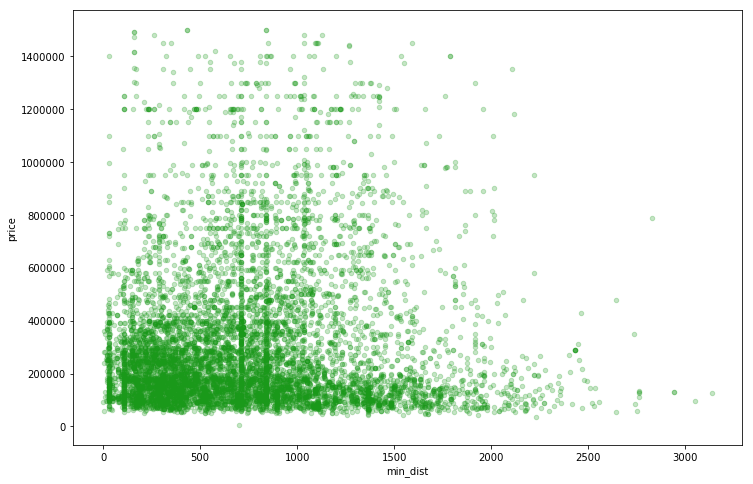

In [8]:
%matplotlib inline
propRecorridoD1 = propRecorridoD[propRecorridoD['price']< 1500000]
propRecorridoD2 = propRecorridoD1[propRecorridoD1['min_dist']< 3500]
propRecorridoD2.plot.scatter('min_dist', 'price',alpha=0.25, figsize=(12,8), color=(0.1,0.6,0.1))